In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree
%matplotlib inline
plt.style.use('bmh')

In [6]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df2 = df[[column for column in df if df[column].count() / len(df) > 0.3]]
del df2['Id']
print("Columnas descartadas son:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
df = df2

Columnas descartadas son: Id, Alley, PoolQC, Fence, MiscFeature, 

In [8]:
df["NEW_Y_VAR"] = np.where(df['SalePrice']>214000.000000 , 1, 0)

In [64]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NEW_Y_VAR
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,1


In [9]:
del df['SalePrice']

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NEW_Y_VAR
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

0    1098
1     362
Name: NEW_Y_VAR, dtype: int64


C:\Users\hugoh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


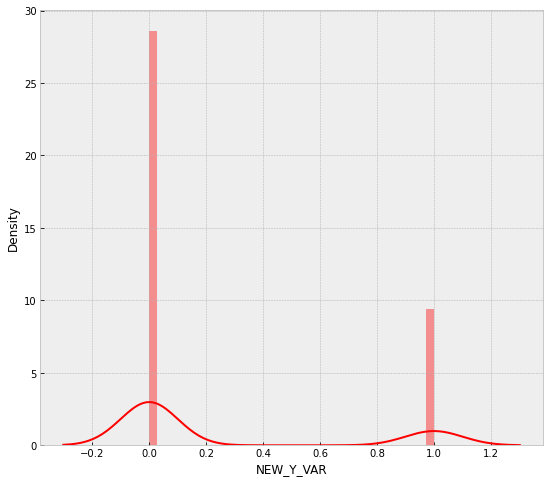

In [12]:
print(df['NEW_Y_VAR'].value_counts())
plt.figure(figsize=(9, 8))
sns.distplot(df['NEW_Y_VAR'], color='r');

## Se puede observar que la variable a predecir se encuentra muy desbalanceada lo que puede provocar problemas al momento de hacer una prediccion

### Se toma la desicion de realizar 2 modelos par medir el impacto del balanceo en el resultado. Uno con la nueva variable balanceada y otro con la variable sin balancear

In [ ]:
####################################
# Modelos predictivos
####################################

In [13]:
## Se obtienen solo las variables numericas y se realiza una transformacion a cuartiles
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [14]:
lst_column = df_num.columns
lst_column

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [15]:
for x in lst_column:
    df_num[x] = pd.qcut(df_num[x], 5, labels= False,duplicates = 'drop')
df_num

<ipython-input-15-a86b6d2c85a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[x] = pd.qcut(df_num[x], 5, labels= False,duplicates = 'drop')
<ipython-input-15-a86b6d2c85a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[x] = pd.qcut(df_num[x], 5, labels= False,duplicates = 'drop')
<ipython-input-15-a86b6d2c85a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,2.0,1,2,0,3,3,1.0,2,0,...,3,0,1,0,0,0,0,0,0,1
1,0,3.0,2,1,2,2,1,0.0,3,0,...,2,2,0,0,0,0,0,0,1,0
2,1,2.0,3,2,0,3,3,1.0,1,0,...,3,0,1,0,0,0,0,0,4,1
3,2,1.0,2,2,0,0,1,0.0,0,0,...,4,0,0,0,0,0,0,0,0,0
4,1,3.0,4,3,0,3,3,2.0,2,0,...,4,1,2,0,0,0,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1.0,1,1,0,3,3,0.0,0,0,...,2,0,0,0,0,0,0,0,3,0
1456,0,3.0,4,1,1,2,2,1.0,2,0,...,2,2,0,0,0,0,0,0,0,3
1457,2,2.0,2,2,2,0,4,0.0,1,0,...,0,0,1,0,0,0,0,0,1,3
1458,0,2.0,2,0,1,1,2,0.0,0,0,...,0,2,0,0,0,0,0,0,0,3


In [16]:
## Una vez calculado y reemplazo el valor por el cuartil en el dataframe, se hace la tranformacion 
## a variable dummie
df_dummie = pd.get_dummies(df_num, columns = lst_column)
df_dummie.head()

,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,LotFrontage_0.0,LotFrontage_1.0,LotFrontage_2.0,LotFrontage_3.0,LotFrontage_4.0,LotArea_0,...,MiscVal_0,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,YrSold_0,YrSold_1,YrSold_2,YrSold_3
0,0,1,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [17]:
#Se agrega la variable objetivo al dataset ya transformado
df_dummie['NEW_Y_VAR'] = df['NEW_Y_VAR']
df_dummie.head()

,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,LotFrontage_0.0,LotFrontage_1.0,LotFrontage_2.0,LotFrontage_3.0,LotFrontage_4.0,LotArea_0,...,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,YrSold_0,YrSold_1,YrSold_2,YrSold_3,NEW_Y_VAR
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1


In [18]:
## Creamos los 2 dataset, uno balanceado y otro no balanceado
df_copy = df_dummie.copy()
df_dummie_bal1 = df_copy.loc[df_copy['NEW_Y_VAR'] == 1].sample(730, random_state=42,replace=True)
df_dummie_bal0 = df_copy.loc[df_copy['NEW_Y_VAR'] == 0].sample(730, random_state=42,replace=True)

df_dummie_bal = pd.concat([df_dummie_bal1, df_dummie_bal0])

In [19]:
print(df_dummie_bal['NEW_Y_VAR'].value_counts())
df_dummie_bal.shape

1    730
0    730
Name: NEW_Y_VAR, dtype: int64


(1460, 117)

In [20]:
print(df_dummie['NEW_Y_VAR'].value_counts())
df_dummie.shape

0    1098
1     362
Name: NEW_Y_VAR, dtype: int64


(1460, 117)

In [21]:
# Se hace la separacion de los grupos de varibles X y Y
x = df_dummie.drop(columns = ['NEW_Y_VAR'], axis=1)
x_bal = df_dummie_bal.drop(columns = ['NEW_Y_VAR'], axis=1)

y = df_dummie['NEW_Y_VAR']
y_bal = df_dummie_bal['NEW_Y_VAR']

## Se realiza un proceso de Hyperparameters Tuning
### Se hace una particion del dataset de 80-20

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_bal, x_test_bal, y_train_bal, y_test_bal = train_test_split(x_bal, y_bal, test_size=0.2, random_state=42)

In [23]:
params_dist = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,None],
              'criterion':['gini','entropy']}

In [24]:
tree_NoBal = tree.DecisionTreeClassifier()
tree_bal = tree.DecisionTreeClassifier()

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
tree_NoBal_CV = RandomizedSearchCV(tree_NoBal, params_dist, cv=100)
tree_bal_CV = RandomizedSearchCV(tree_bal, params_dist, cv=100)

In [27]:
tree_NoBal_CV.fit(x_train, y_train)
tree_bal_CV.fit(x_train_bal, y_train_bal)

RandomizedSearchCV(cv=100, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, None]})

In [28]:
print("Mejores parametros no balanceado: {}".format(tree_NoBal_CV.best_params_))
print("El mejor score es {}".format(tree_NoBal_CV.best_score_))
print('========================================================================')
print("Mejores parametros balanceado: {}".format(tree_bal_CV.best_params_))
print("El mejor score es {}".format(tree_bal_CV.best_score_))

Mejores parametros no balanceado: {'max_depth': 6, 'criterion': 'gini'}
El mejor score es 0.9274999999999999
Mejores parametros balanceado: {'max_depth': 10, 'criterion': 'gini'}
El mejor score es 0.9484090909090908


In [29]:
y_predict_cv_NoBal = tree_NoBal_CV.predict(x_test)
y_predict_cv_Bal = tree_bal_CV.predict(x_test_bal)

In [30]:
print('=========================================')
print('Matriz de confusion, modelo no balanceado')
confusion_matrix_cv_NoBal = confusion_matrix(y_test, y_predict_cv_NoBal)
print(confusion_matrix_cv_NoBal)
print('=========================================')
print('Matriz de confusion, modelo balanceado')
confusion_matrix_cv_bal = confusion_matrix(y_test_bal, y_predict_cv_Bal)
print(confusion_matrix_cv_bal)

Matriz de confusion, modelo no balanceado
[[209  15]
 [ 12  56]]
Matriz de confusion, modelo balanceado
[[138   6]
 [  2 146]]


In [33]:
print('========================================================')
print('Metricas del modelo con datos no balanceados\n')
print(classification_report(y_test, y_predict_cv_NoBal))
print('========================================================')
print('Metricas del modelo con datos balanceados\n')
print(classification_report(y_test_bal, y_predict_cv_Bal))
print('========================================================')

Metricas del modelo con datos no balanceados

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       224
           1       0.79      0.82      0.81        68

    accuracy                           0.91       292
   macro avg       0.87      0.88      0.87       292
weighted avg       0.91      0.91      0.91       292

Metricas del modelo con datos balanceados

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       144
           1       0.96      0.99      0.97       148

    accuracy                           0.97       292
   macro avg       0.97      0.97      0.97       292
weighted avg       0.97      0.97      0.97       292



### Adicionalmente y por curiosidad se hace el modelo sin realizar transformaciones por cuartiles y variables dummie. En este orden de ideas, se van a realizar 2 modelos, uno balanceado y otro no balanceado

El sufijo _nt lo utilizo como contraccion de No Transformation

In [70]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
df2 = df[[column for column in df if df[column].count() / len(df) > 0.3]]
del df2['Id']
print("Columnas descartadas son:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
df = df2
df["NEW_Y_VAR"] = np.where(df['SalePrice']>214000.000000 , 1, 0)
del df['SalePrice']
df.head()

Columnas descartadas son: Id, Alley, PoolQC, Fence, MiscFeature, 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NEW_Y_VAR
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,1


In [72]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [73]:
print(df['NEW_Y_VAR'].value_counts())

0    1098
1     362
Name: NEW_Y_VAR, dtype: int64


In [74]:
## Se obtienen solo las variables numericas y se realiza una transformacion a cuartiles
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [75]:
df_num = clean_dataset(df_num)

<ipython-input-72-19e362bcb334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [80]:
df_num['NEW_Y_VAR'] = df['NEW_Y_VAR']
df_copy = df_num.copy()
df_bal1 = df_copy.loc[df_copy['NEW_Y_VAR'] == 1].sample(560, random_state=42,replace=True)
df_bal0 = df_copy.loc[df_copy['NEW_Y_VAR'] == 0].sample(561, random_state=42,replace=True)

df_bal = pd.concat([df_bal1, df_bal0])
df_bal.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,NEW_Y_VAR
460,60.0,75.0,8004.0,8.0,5.0,2009.0,2009.0,110.0,544.0,0.0,...,0.0,150.0,0.0,0.0,0.0,0.0,0.0,12.0,2009.0,1
1353,50.0,56.0,14720.0,8.0,5.0,1995.0,1996.0,579.0,816.0,0.0,...,283.0,86.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,1
477,60.0,105.0,13693.0,9.0,5.0,2006.0,2006.0,772.0,0.0,0.0,...,414.0,84.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0,1
309,20.0,90.0,12378.0,9.0,5.0,2003.0,2004.0,0.0,1274.0,0.0,...,208.0,175.0,0.0,0.0,0.0,0.0,0.0,11.0,2006.0,1
848,50.0,75.0,45600.0,6.0,8.0,1908.0,1997.0,0.0,0.0,0.0,...,486.0,40.0,0.0,0.0,175.0,0.0,0.0,9.0,2008.0,1


In [81]:
df_num.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,NEW_Y_VAR
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,56.146298,70.665477,10122.956289,6.212310,5.561106,1972.264942,1985.683318,108.487957,438.399643,44.589652,...,92.610169,46.130241,21.844781,3.348796,16.100803,2.934880,23.429081,6.339875,2007.795718,0.261374
std,41.772684,24.266812,8129.302641,1.380822,1.068236,30.967730,21.025974,189.500966,468.385038,157.828725,...,121.868623,64.390029,61.282083,29.772540,57.801829,40.222087,165.759816,2.687854,1.335043,0.439579
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,60.000000,7590.000000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,50.000000,70.000000,9416.000000,6.000000,5.000000,1974.000000,1995.000000,0.000000,374.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,70.000000,80.000000,11361.000000,7.000000,6.000000,2003.000000,2005.000000,170.000000,702.000000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,1.000000


In [82]:
df_bal.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,NEW_Y_VAR
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,...,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,52.310437,74.398751,10610.266726,6.689563,5.507583,1978.946476,1989.990187,136.799286,539.123104,37.531668,...,111.881356,57.565566,17.017841,3.604817,19.752899,2.423729,19.464764,6.584300,2007.870651,0.499554
std,37.312220,23.808101,5003.109244,1.477802,1.028255,30.798289,19.913314,208.193732,506.336750,133.887370,...,129.368242,69.335593,55.464175,30.925370,63.660038,36.262261,142.214874,2.771714,1.333713,0.500223
min,20.000000,21.000000,1477.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,60.000000,8520.000000,5.000000,5.000000,1959.000000,1975.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000
50%,50.000000,74.000000,10000.000000,7.000000,5.000000,1994.000000,1999.000000,0.000000,483.000000,0.000000,...,100.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000
75%,60.000000,85.000000,12150.000000,8.000000,6.000000,2005.000000,2006.000000,234.000000,929.000000,0.000000,...,192.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000
max,190.000000,313.000000,53504.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2096.000000,1085.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,576.000000,2500.000000,12.000000,2010.000000,1.000000


In [83]:
print('====================================')
print('Datos balanceados')
print(df_bal['NEW_Y_VAR'].value_counts())
print('====================================')
print('Datos no balanceados')
print(df_num['NEW_Y_VAR'].value_counts())

Datos balanceados
0    561
1    560
Name: NEW_Y_VAR, dtype: int64
Datos no balanceados
0    828
1    293
Name: NEW_Y_VAR, dtype: int64


In [84]:
# Se hace la separacion de los grupos de varibles X y Y
x_nt = df_num.drop(columns = ['NEW_Y_VAR'], axis=1)
x_bal_nt = df_bal.drop(columns = ['NEW_Y_VAR'], axis=1)

y_nt = df_num['NEW_Y_VAR']
y_bal_nt = df_bal['NEW_Y_VAR']

In [85]:
x_train_nt, x_test_nt, y_train_nt, y_test_nt = train_test_split(x_nt, y_nt, test_size=0.2, random_state=42)
x_train_bal_nt, x_test_bal_nt, y_train_bal_nt, y_test_bal_nt = train_test_split(x_bal_nt, y_bal_nt, test_size=0.2, random_state=42)

In [86]:
tree_NoBal_nt = tree.DecisionTreeClassifier()
tree_bal_nt = tree.DecisionTreeClassifier()

In [87]:
tree_NoBal_CV_nt = RandomizedSearchCV(tree_NoBal_nt, params_dist, cv=100)
tree_bal_CV_nt = RandomizedSearchCV(tree_bal_nt, params_dist, cv=100)

In [88]:
tree_NoBal_CV_nt.fit(x_train_nt, y_train_nt)
tree_bal_CV_nt.fit(x_train_bal_nt, y_train_bal_nt)

RandomizedSearchCV(cv=100, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, None]})

In [89]:
print("Mejores parametros no balanceado: {}".format(tree_NoBal_CV.best_params_))
print("El mejor score es {}".format(tree_NoBal_CV.best_score_))
print('========================================================================')
print("Mejores parametros balanceado: {}".format(tree_bal_CV.best_params_))
print("El mejor score es {}".format(tree_bal_CV.best_score_))

Mejores parametros no balanceado: {'max_depth': 6, 'criterion': 'gini'}
El mejor score es 0.9274999999999999
Mejores parametros balanceado: {'max_depth': 10, 'criterion': 'gini'}
El mejor score es 0.9484090909090908


In [91]:
y_predict_cv_NoBal_nt = tree_NoBal_CV_nt.predict(x_test_nt)
y_predict_cv_Bal_nt = tree_bal_CV_nt.predict(x_test_bal_nt)

In [92]:
print('=========================================')
print('Matriz de confusion, modelo no balanceado')
confusion_matrix_cv_NoBal_nt = confusion_matrix(y_test_nt, y_predict_cv_NoBal_nt)
print(confusion_matrix_cv_NoBal_nt)
print('=========================================')
print('Matriz de confusion, modelo balanceado')
confusion_matrix_cv_bal_nt = confusion_matrix(y_test_bal_nt, y_predict_cv_Bal_nt)
print(confusion_matrix_cv_bal_nt)

Matriz de confusion, modelo no balanceado
[[157  12]
 [ 10  46]]
Matriz de confusion, modelo balanceado
[[ 99   7]
 [  0 119]]


In [93]:
print('========================================================')
print('Metricas del modelo con datos no balanceados\n')
print(classification_report(y_test_nt, y_predict_cv_NoBal_nt))
print('========================================================')
print('Metricas del modelo con datos balanceados\n')
print(classification_report(y_test_bal_nt, y_predict_cv_Bal_nt))
print('========================================================')

Metricas del modelo con datos no balanceados

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       169
           1       0.79      0.82      0.81        56

    accuracy                           0.90       225
   macro avg       0.87      0.88      0.87       225
weighted avg       0.90      0.90      0.90       225

Metricas del modelo con datos balanceados

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       106
           1       0.94      1.00      0.97       119

    accuracy                           0.97       225
   macro avg       0.97      0.97      0.97       225
weighted avg       0.97      0.97      0.97       225



# Conclusiones

- Balancear la variable objetivo ayuda al modelo a predecir con mayor exactitud los valores de 0 (SalePrice < 214K USD).
- La cantidad de datos utilizados es insuficiente para los 4 modelos presentados. Mas datos de prueba y entrenamiento son necesarios para ratificar un modelo como mejor que otro.
- Los modelos con datos balanceados presentaron una mayor altura que los modelos no balanceados.
- El modelo con datos sin tranformaciones y balaceados muy seguramente esta en un estado de overfiting. Posiblemente causado por el tamano del dataset utilizado. Una solucion al posible problema de overfiting seria aplicar un podado al arbol y obtener las estadisticas nuevamente.
- Como un escenario ideal es necesario una mayor cantidad de datos en el dataset, una transformacion de cuartiles y luego a variables dummie y por ultimo un balanceo de la variable objetivo.
- Mas puebas son necesarias para concluir la mejor forma de atacar el problema.